# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
pd.options.display.float_format = '{:,.2f}%'.format
data_chil = data.pivot_table(index = ['children'], values = 'debt',  aggfunc = ['count', 'sum', 'mean'])
data_chil = data_chil.reset_index()
data_chil.columns = ['Кол-во детей', 'Всего заемщиков', 'Всего должников', 'Доля должников']
data_chil['Доля должников'] = data_chil['Доля должников']*100
data_chil['Доля от общего кол-ва'] = data_chil['Всего заемщиков'] / data_chil['Всего заемщиков'].sum() * 100
print(data_chil)

   Кол-во детей  Всего заемщиков  Всего должников  Доля должников  \
0             0            14091             1063           7.54%   
1             1             4808              444           9.23%   
2             2             2052              194           9.45%   
3             3              330               27           8.18%   
4             4               41                4           9.76%   
5             5                9                0           0.00%   

   Доля от общего кол-ва  
0                 66.06%  
1                 22.54%  
2                  9.62%  
3                  1.55%  
4                  0.19%  
5                  0.04%  


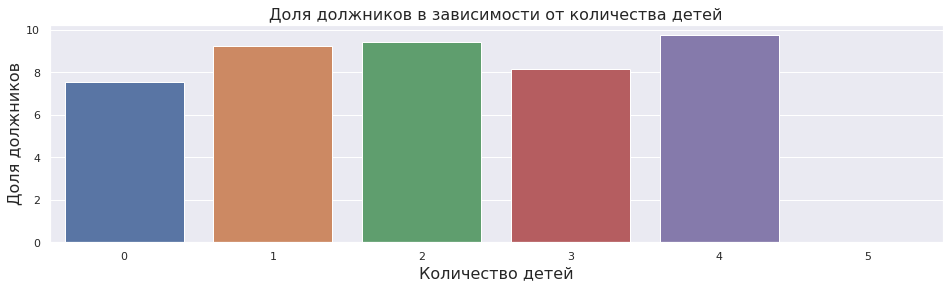

In [23]:
seaborn.set(rc={"figure.figsize":( 16 , 4 )})
seaborn.barplot(x='Кол-во детей', y='Доля должников', data = data_chil).set(
    title = 'Доля должников в зависимости от количества детей'
);
plt.xlabel('Количество детей', size= 16 , weight= 100);
plt.ylabel('Доля должников', size= 16, weight= 100);
plt.title('Доля должников в зависимости от количества детей', size= 16, weight= 100);

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>
    
Отлично, что испольуешь графики в этом проекте. Они делают представление результатов расчетов намного нагляднее и понятнее. Твоя способность визуализировать информацию показывает, что ты знаешь, как преподнести информацию так, чтобы она была легко понятна для других. 👌
    
</div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Для того, чтобы график смотрелся аккуратнее стоит убрать надпись `<AxesSubplot:...>`, добавить название, подписать оси. Размер графика можно отрегулировать параметром `figsize`.</div>

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Я смог изменить размер, нашел, как менять размер подписей с natplotlib, но не seaborn, увы. Буду рад подсказке
Кроме этого, не получается убрать текст сверху, не понимаю, как это сделать, тут тоже буду рад помощи. </div>


<div class="alert-success" style="border-radius: 10px; padding: 10px">
<b>Комментарий ревьюера V2 ✔️</b>

Существуют разные способы, я обычно добавляю все нужные элементы с помошью Matplotlib 👇</div>

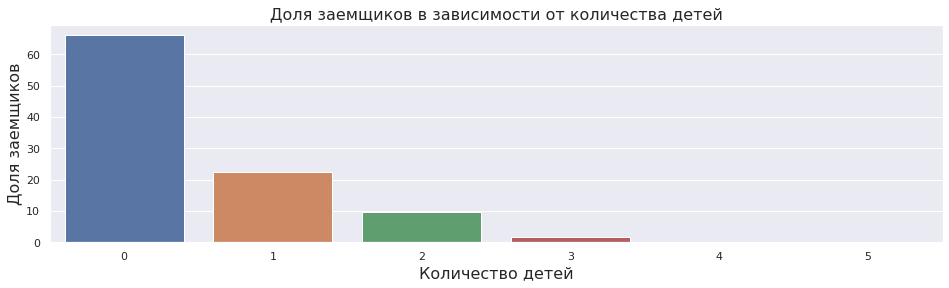

In [24]:
seaborn.barplot(x='Кол-во детей', y='Доля от общего кол-ва', data = data_chil);
plt.xlabel('Количество детей', size= 16 , weight= 100);
plt.ylabel('Доля заемщиков', size= 16, weight= 100);
plt.title('Доля заемщиков в зависимости от количества детей', size= 16, weight= 100);

**Вывод:**  
На первый взгляд может показаться, что семьи с **5** детьми всегда погашают кредит в соответствии с договором. Однако необходимо учитывать, что в генеральной совокупности доля таких семей ничтожно мала: только <u>9 (0,04%)</u> заемщиков указали такое количество детей.  
Предположим, что значимой является доля в 5% и выше. Тогда делать однозначные выводы о заемщиках с **3** и **4** детьми некорректно, так как их доли среди всех заемщиков составляют <u>1,55%</u> и <u>0,19%</u> соответственно.  
Среди семей с **1** и **2** детьми доли кредитов, по которым возникала задолженность, примерно равны - <u>9,24%</u> и <u>9,45%</u> соответственно. 
В то же время среди заемщиков **без детей** задолженность возникала лишь в <u>7,54%</u> случаев.   
Таким образом, исходя из имеющихся данных, можем сделать вывод, что заемщики без детей ***реже*** допускают нарушение кредитного договора в части сроков внесения платежа, чем заемщики с 1 и 2 детьми, доля нарушений договоров по которым примерно равна. Сделать однозначные достоверные выводы о заемщиках с 3, 4 и 5 детьми невозможно, так как отсутствует необходимое количество наблюдений.


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
data_stat = data.pivot_table(index = ['family_status'], values = 'debt',  aggfunc = ['count', 'sum', 'mean'])
data_stat = data_stat.reset_index()
data_stat.columns = ['Семейный статус', 'Всего заемщиков', 'Всего должников', 'Доля должников']
data_stat['Доля должников'] = data_stat['Доля должников']*100
data_stat['Доля от общего кол-ва'] = data_stat['Всего заемщиков'] / data_stat['Всего заемщиков'].sum() * 100
print(data_stat)

         Семейный статус  Всего заемщиков  Всего должников  Доля должников  \
0  Не женат / не замужем             2796              273           9.76%   
1              в разводе             1189               84           7.06%   
2         вдовец / вдова              951               63           6.62%   
3       гражданский брак             4134              385           9.31%   
4        женат / замужем            12261              927           7.56%   

   Доля от общего кол-ва  
0                 13.11%  
1                  5.57%  
2                  4.46%  
3                 19.38%  
4                 57.48%  


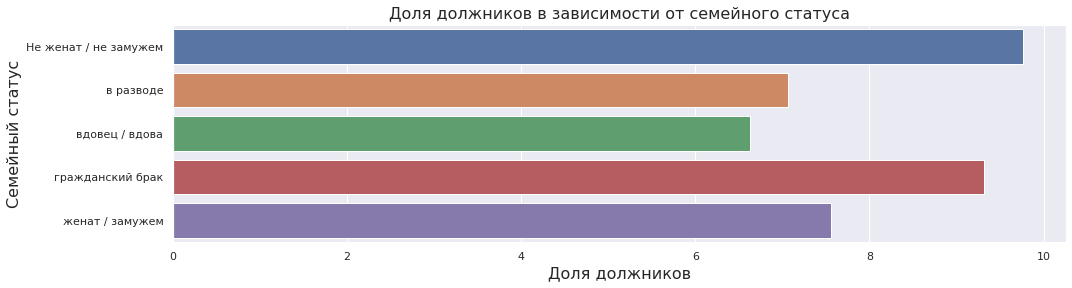

In [26]:
seaborn.barplot(x='Доля должников', y='Семейный статус', data = data_stat);
plt.xlabel('Доля должников', size= 16 , weight= 100);
plt.ylabel('Семейный статус', size= 16, weight= 100);
plt.title('Доля должников в зависимости от семейного статуса', size= 16, weight= 100);

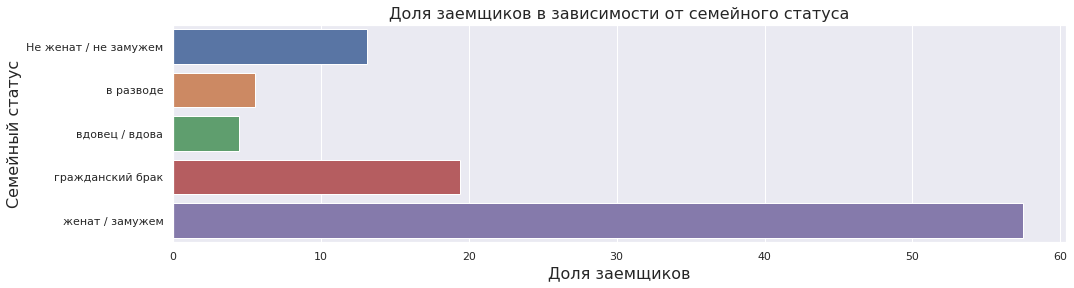

In [27]:
seaborn.barplot(x='Доля от общего кол-ва', y='Семейный статус', data = data_stat);
plt.xlabel('Доля заемщиков', size= 16 , weight= 100);
plt.ylabel('Семейный статус', size= 16, weight= 100);
plt.title('Доля заемщиков в зависимости от семейного статуса', size= 16, weight= 100);

**Вывод:**  
*Наименьшая* доля (<u>6,62%</u>) кредитов с задолженностью наблюдается среди заемщиков в статусе **"вдовец/вдова"**.  
Заемщики **в разводе** допускали возникновение задолженности в <u>7,06%</u> случаев.  
При этом доля таких заемщиков среди общего количества составляет 4,46% и 5,57%. Требуется дальнейший анализ, так как увеличение выборки может привести к существенному изменению результата. 
**Женатые/замужние** заемщики допускали нарушение кредитных договоров в <u>7,56%</u> случаев.  
Худшие показатели у заемщиков, проживающих в **гражданском браке** (<u>9,31%</u>), а также **не замужних/не женатых** заемщиков (<u>9,76%</u>). 


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
data_inc = data.pivot_table(index = ['total_income_category'], values = 'debt',  aggfunc = ['count', 'sum', 'mean'])
data_inc = data_inc.reset_index()
data_inc.columns = ['Категория дохода', 'Всего заемщиков', 'Всего должников', 'Доля должников']
data_inc['Доля должников'] = data_inc['Доля должников']*100
data_inc['Доля от общего кол-ва'] = data_inc['Всего заемщиков'] / data_inc['Всего заемщиков'].sum() * 100
print(data_inc)

  Категория дохода  Всего заемщиков  Всего должников  Доля должников  \
0                A               25                2           8.00%   
1                B             5014              354           7.06%   
2                C            15921             1353           8.50%   
3                D              349               21           6.02%   
4                E               22                2           9.09%   

   Доля от общего кол-ва  
0                  0.12%  
1                 23.51%  
2                 74.64%  
3                  1.64%  
4                  0.10%  


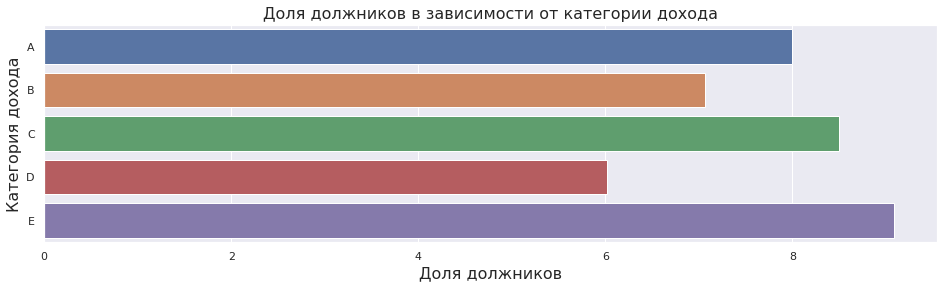

In [29]:
seaborn.barplot(x='Доля должников', y='Категория дохода', data = data_inc);
plt.xlabel('Доля должников', size= 16 , weight= 100);
plt.ylabel('Категория дохода', size= 16, weight= 100);
plt.title('Доля должников в зависимости от категории дохода', size= 16, weight= 100);

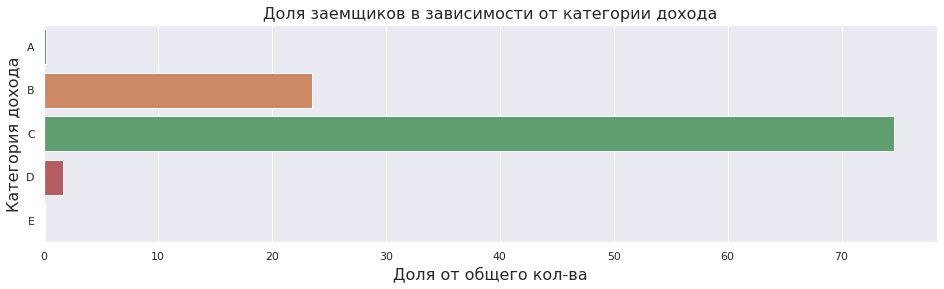

In [30]:
seaborn.barplot(x='Доля от общего кол-ва', y='Категория дохода', data = data_inc);
plt.xlabel('Доля от общего кол-ва', size= 16 , weight= 100);
plt.ylabel('Категория дохода', size= 16, weight= 100);
plt.title('Доля заемщиков в зависимости от категории дохода', size= 16, weight= 100);

**Вывод:**  
Доля заемщиков, относящихся к категориям **A** (0,12%), **E** (0,10%) и **D** (1,64%), в генеральной совокупности является несущественной, выводы о наличии/отсутствии взаимосвязи между уровнем дохода и возвратом кредита в срок, а также о силе такой связи не будут обоснованы.  
Большая часть заемщиков располагает доходом, позволяющим отнести их к категории **C** (74,64%). Доля кредитов, по которым у таких заемщиков возникает задолженность, составляет <u>8,50%</u>.  
Заемщики, доходы которых относятся к категории **B** (23,50%), допускали нарушение договоров в <u>7,06%</u> наблюдений.  

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [31]:
data_purp = data.pivot_table(index = ['purpose_category'], values = 'debt',  aggfunc = ['count', 'sum', 'mean'])
data_purp = data_purp.reset_index()
data_purp.columns = ['Цель кредита', 'Всего заемщиков', 'Всего должников', 'Доля должников']
data_purp['Доля должников'] = data_purp['Доля должников']*100
data_purp['Доля от общего кол-ва'] = data_purp['Всего заемщиков'] / data_purp['Всего заемщиков'].sum() * 100
print(data_purp)

               Цель кредита  Всего заемщиков  Всего должников  Доля должников  \
0    операции с автомобилем             4279              400           9.35%   
1  операции с недвижимостью            10751              780           7.26%   
2     получение образования             3988              369           9.25%   
3        проведение свадьбы             2313              183           7.91%   

   Доля от общего кол-ва  
0                 20.06%  
1                 50.40%  
2                 18.70%  
3                 10.84%  


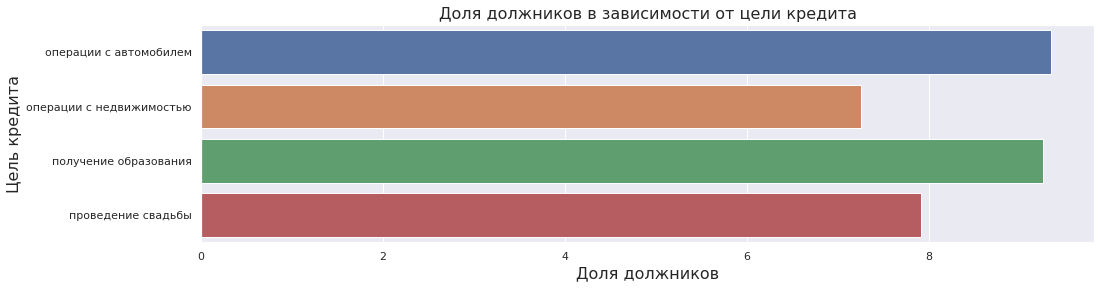

In [32]:
seaborn.barplot(x='Доля должников', y='Цель кредита', data = data_purp);
plt.xlabel('Доля должников', size= 16 , weight= 100);
plt.ylabel('Цель кредита', size= 16, weight= 100);
plt.title('Доля должников в зависимости от цели кредита', size= 16, weight= 100);

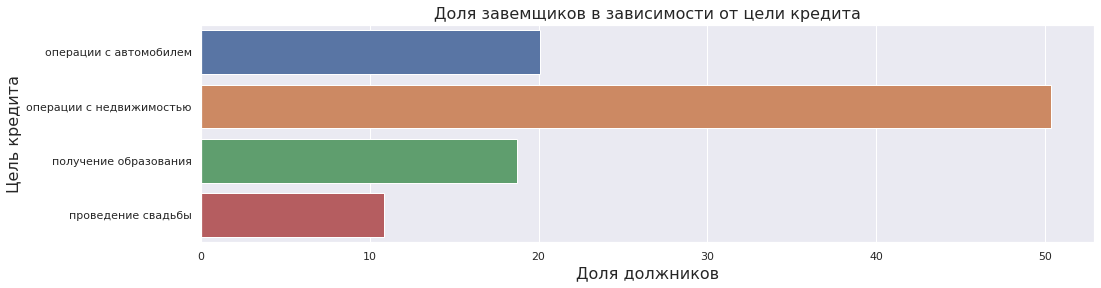

In [33]:
seaborn.barplot(x='Доля от общего кол-ва', y='Цель кредита', data = data_purp);
plt.xlabel('Доля должников', size= 16 , weight= 100);
plt.ylabel('Цель кредита', size= 16, weight= 100);
plt.title('Доля завемщиков в зависимости от цели кредита', size= 16, weight= 100);

**Вывод:**   
Наименьшая доля нарушения срока внесения очередного платежа наблюдается по кредитам, взятым на **операции с недвижимостью**, и составляет <u>7,26%</u>. Немного чаще не возвращают кредит в срок заемщики, цель которых **проведение свадьбы** (в <u>7,91%</u> случаев).  
Наибольшая доля нарушения сроков возврата кредита наблюдается в отношении займов на **операции с автомобилем** (<u>9,35%</u>) и **получение образования** (<u>9,25%</u>).

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Как известно, пропуски могут быть:  
- полностью случайные: если вероятность встретить пропуск не зависит ни от каких других значений.  
- случайные: если вероятность пропуска зависит от других значений в наборе данных, но не от значений собственного столбца.   
- неслучайные: если вероятность пропуска зависит от других значений, в том числе и от значений собственного столбца. 

Пропуски в исследуемых данных могут возникать по ряду причин:  
- данные не являются обязательными для заполнения, поэтому не были получены на этапе сбора информации;
- потенциальный заемщик/кредитный менеджер допустили ошибку при заполнении определенных полей;
- потенциальный заемщик/кредитный менеджер умышленно утаили/исказили информацию, посчитав, что это не повлияет на шансы получения кредита/увеличит шансы одобрения кредита.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. В таком случае медиана является значением, более точно характеризующим выборку, деля ее пополам - одна половина наблюдаемых значений больше медианы, а другая - меньше.   

### Шаг 4: общий вывод.

Безусловно, парная корреляция является важным показателем взаимосвязи между двумя наблюдаемыми рядами. При этом необходимо помнить, что наличие такой взаимосвязи не исключает возможности влияния других факторов.  
На мой взгляд, для получения наиболее достоверной оценки вероятности нарушения срока возврата кредита необходимо:
- применить скоринговую систему оценки потенциального заемщика: для каждого показателя необходимо ввести балльную шкалу, оценивать заемщика по сумме набранных баллов;
- продолжить анализ поступающих данных для выявления новых взаимосвязей, а также подтверждения/опровержения выдвинутых гипотез. 

На первом этапе мы оценили данные, возможность их использования для анализа.  
На втором этапе обработали аномальные значения и повторы, чтобы избежать искажения полученных результатов.  
На третьем этапе проанализировали данные, чтобы выявить степень влияния различных факторов на возврат кредита в установленный срок.  
Из имеющихся данных, можем сделать вывод, что заемщики без детей реже допускают нарушение кредитного договора в части сроков внесения платежа, чем заемщики с 1 и 2 детьми, доля нарушений договоров по которым примерно равна. Сделать однозначные достоверные выводы о заемщиках с 3, 4 и 5 детьми не удалось, так как отсутствует достаточное для этого количество данных.
Наименьшая доля кредитов с задолженностью наблюдается среди заемщиков в статусе "вдовец/вдова", а также заемщики в разводе.
При этом доля таких заемщиков среди общего количества достаточно мала; требуется дальнейший анализ, так как увеличение выборки может привести к существенному изменению результата. Женатые/замужние заемщики допускали нарушение кредитных договоров в 7,56% случаев.
Худшие показатели у заемщиков, проживающих в гражданском браке, а также не замужних/не женатых заемщиков.
Большая часть заемщиков располагает доходом, позволяющим отнести их к категории C (74,64%). Доля кредитов, по которым у таких заемщиков возникает задолженность, составляет 8,50%. Заемщики, доходы которых относятся к категории B, допускали нарушение договоров реже.
Наименьшая доля нарушения срока внесения очередного платежа наблюдается по кредитам, взятым на операции с недвижимостью. Немного чаще не возвращают кредит в срок заемщики, цель которых проведение свадьбы.
Наибольшая доля нарушения сроков возврата кредита наблюдается в отношении займов на операции с автомобилем и получение образования.